# 1.Data Cleaning

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import json
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, pearsonr, ttest_ind, spearmanr
from scipy.interpolate import interp1d, PchipInterpolator
from glob import glob
from datetime import datetime
from IPython.display import clear_output
import random
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import tensorflow.keras.backend as K
from B_dataprocessing import *
from B_DNN_model import *
from B_plotting import *

Init Plugin
Init Graph Optimizer
Init Kernel


## 1.1Raw Data

In [2]:
all_metrics_df,testParamDf = data_generation()

Unique DODs 18
Unique discharging_protocol 23
Unique charging_protocol 47
8
12
5


In [5]:
# 2nd Order only!
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(0,1):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

In [4]:
#It's EVERYTHING -> 2min to RUN
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(len(test_coef)):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

Optimization terminated successfully.
         Current function value: 0.569490
         Iterations: 174
         Function evaluations: 316
Optimization terminated successfully.
         Current function value: 3.238437
         Iterations: 166
         Function evaluations: 293
Optimization terminated successfully.
         Current function value: 4.532901
         Iterations: 153
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 3.550682
         Iterations: 159
         Function evaluations: 273
Optimization terminated successfully.
         Current function value: 0.523399
         Iterations: 126
         Function evaluations: 227
Optimization terminated successfully.
         Current function value: 0.596615
         Iterations: 126
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 1.334330
         Iterations: 142
         Function evaluations: 254
Optimization termina

/Users/yeyangzu/Documents/4. Career/Stanford/Courses/CS/CS230/Project/Git/Stanford_Battery_Project/Final_Project_AWS_Version/B_dataprocessing.py:74: RuntimeWarning: invalid value encountered in double_scalars
  rms_pow2 = lambda beta, x, y: np.sqrt(np.sum(np.square((f_pow2(beta,x)-y))) / len(y)) * 100 * len(y) / np.sum(y)



Optimization terminated successfully.
         Current function value: 3.415557
         Iterations: 38
         Function evaluations: 75
Optimization terminated successfully.
         Current function value: 0.246889
         Iterations: 82
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 1.387399
         Iterations: 78
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 0.156818
         Iterations: 106
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 0.191299
         Iterations: 123
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 1.073795
         Iterations: 113
         Function evaluations: 200
Optimization terminated successfully.
         Current function value: 0.266335
         Iterations: 131
         Function evaluations: 235
Optimization terminated

/Users/yeyangzu/Documents/4. Career/Stanford/Courses/CS/CS230/Project/Git/Stanford_Battery_Project/Final_Project_AWS_Version/B_dataprocessing.py:124: RuntimeWarning: invalid value encountered in double_scalars
  rms_pow3 = lambda beta, x, y: np.sqrt(np.sum(np.square((f_pow3(beta,x)-y))) / len(y)) * 100 * len(y) / np.sum(y)


Optimization terminated successfully.
         Current function value: 3.415546
         Iterations: 51
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.231188
         Iterations: 154
         Function evaluations: 274
Optimization terminated successfully.
         Current function value: 0.807778
         Iterations: 274
         Function evaluations: 463
Optimization terminated successfully.
         Current function value: 0.113663
         Iterations: 128
         Function evaluations: 214
Optimization terminated successfully.
         Current function value: 0.170217
         Iterations: 159
         Function evaluations: 280
Optimization terminated successfully.
         Current function value: 0.453266
         Iterations: 133
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: 0.184468
         Iterations: 157
         Function evaluations: 279
Optimization terminate

/Users/yeyangzu/Documents/4. Career/Stanford/Courses/CS/CS230/Project/Git/Stanford_Battery_Project/Final_Project_AWS_Version/B_dataprocessing.py:174: RuntimeWarning: invalid value encountered in double_scalars
  rms_pow4 = lambda beta, x, y: np.sqrt(np.sum(np.square((f_pow4(beta,x)-y))) / len(y)) * 100 * len(y) / np.sum(y)


Optimization terminated successfully.
         Current function value: 3.414698
         Iterations: 63
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 0.318265
         Iterations: 291
         Function evaluations: 491
Optimization terminated successfully.
         Current function value: 0.543976
         Iterations: 380
         Function evaluations: 638
Optimization terminated successfully.
         Current function value: 0.341022
         Iterations: 305
         Function evaluations: 512
Optimization terminated successfully.
         Current function value: 0.393311
         Iterations: 410
         Function evaluations: 683
Optimization terminated successfully.
         Current function value: 0.816622
         Iterations: 354
         Function evaluations: 596
Optimization terminated successfully.
         Current function value: 0.514335
         Iterations: 331
         Function evaluations: 563
Optimization terminat

KeyboardInterrupt: 

# Version


### Label Ouput Y with cell keys

In [6]:
version = '0'
X,y,Y,X_Y_merged = eval('X'+version),eval('y'+version),eval('Y'+version),eval('X_Y_merged'+version)
objective = eval('objective_'+version)
#key_parameters
y_matrix_key = np.array([k for k,v in Y.items()]).reshape(-1,1)
y_selected_key = y_matrix_key.squeeze()
#y with key column
y_with_key = np.append(y, y_matrix_key, axis = 1)

## 1.3 Y visualization -> Linear Scaling

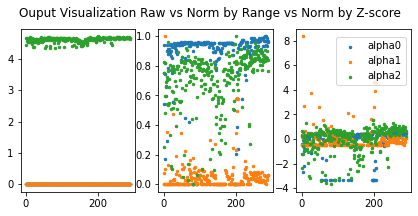

In [40]:
fig, axs = plt.subplots(1,3,figsize=(7, 3))
fig.suptitle('Ouput Visualization Raw vs Norm by Range vs Norm by Z-score')
x_ax = range(len(X))
_,num_outputs = y.shape
scaler = StandardScaler()
y_norm = scaler.fit_transform(y)
for i in range(num_outputs):
    axs[0].scatter(x_ax, y[:,i],  s=6, label=f"y{i}-test")
    axs[1].scatter(x_ax, (y[:,i]-min(y[:,i]))/(max(y[:,i])-min(y[:,i])),  s=6, label=f"y{i}-test")
    axs[2].scatter(x_ax, y_norm[:,i],s=6, label=f"alpha{i}")
plt.legend(loc='center left', bbox_to_anchor=(0.3, 0.8))
plt.show()

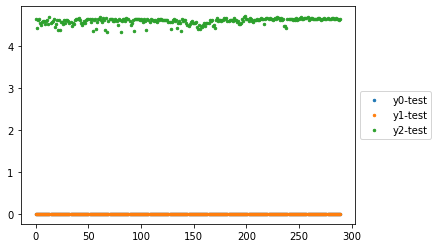

In [25]:
x_ax = range(len(X))
_,num_outputs = y.shape
for i in range(num_outputs):
    plt.scatter(x_ax, y[:,i],  s=6, label=f"y{i}-test")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

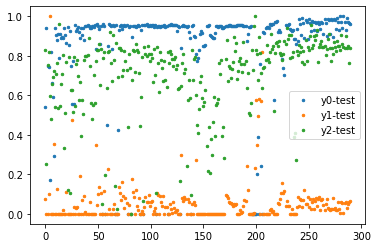

In [6]:
for i in range(num_outputs):
    plt.scatter(x_ax, (y[:,i]-min(y[:,i]))/(max(y[:,i])-min(y[:,i])),  s=6, label=f"y{i}-test")
plt.legend()

plt.legend()
plt.show()

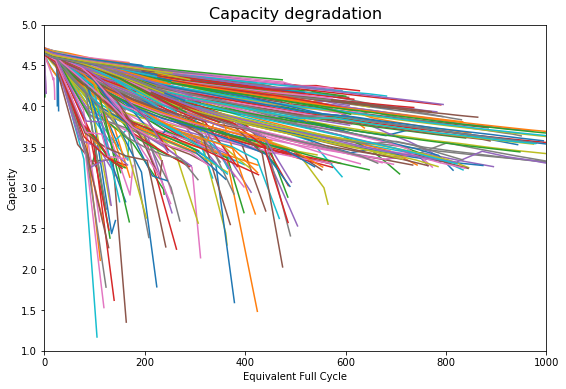

In [7]:
#empirical data
l=1000
d=1
plt.figure(figsize=(9,6))
plot_empirical(l,d,all_metrics_df)

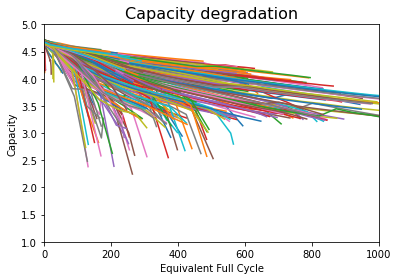

In [8]:
#selected empirical data
plot_empirical_selected(y_selected_key,l,d,all_metrics_df)

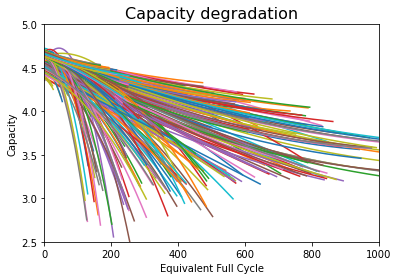

In [10]:
#selected fitting data
l = 1000
w = 2.5
plot_curve_pred(y_with_key,y_selected_key,l,w,all_metrics_df,objective)

## 1.4 Input data Argumentation

In [11]:
X_original = X.copy()

In [12]:
X = X_original.copy()

In [13]:
polyx = create_poly(X_original,3)
print(polyx.shape)
X = polyx

(290, 30)


# 2. Train the model

In [14]:
#full gamma
X_train,X_test,X_val, y_train_coef,y_test_coef,y_val_coef,y_train,y_test,y_val,y_train_norm,y_test_norm,y_val_norm=data_split(X,y_with_key)

#set the model
loss_fun = 'mae'
model0 = sequential_model(70,50,20,loss_fun,X_train,y_train)
model0.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2021-11-22 13:56:50.477087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-22 13:56:50.477200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                2170      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 6,803
Trainable params: 6,803
Non-trainable params: 0
_________________________________________________________________


# 3.Prediction

In [671]:
#no validation 
class_weight0 = {0: 1.,
                1: 1.,
                2: 1.}
class_weight = {0: 1000000.,
                1: 1000.,
                2: 1.}
                

lr_model_history_no_val = model0.fit(X_train, y_train_norm, 
                        epochs=100, 
                        verbose=0,
                        class_weight = class_weight
                        ,validation_data=(X_val, y_val_norm))

raw_y_pred = model0.predict(X_test)
y_pred = recover(raw_y_pred,y_train)
var_num = y_pred.shape[1]
for i in range(var_num):
    print(f"y{i}MSE:%.4f" % mean_squared_error(y_test[:,i], y_pred[:,i]))
for i in range(var_num):
    print(f"y{i}MAE:%.4f" % mae(y_test[:,i], y_pred[:,i]))

2021-11-18 16:32:36.154831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-18 16:32:36.299404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


y0MSE:0.0000
y1MSE:0.0000
y2MSE:0.0006
y0MAE:0.0000
y1MAE:0.0002
y2MAE:0.0171


2021-11-18 16:32:41.600845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


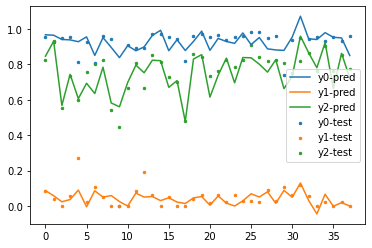

In [672]:
x_ax = range(len(X_test))
for i in range(var_num):
    plt.scatter(x_ax, y_test_norm[:,i],  s=6, label=f"y{i}-test")
    plt.plot(x_ax, raw_y_pred[:,i], label=f"y{i}-pred")
plt.legend()
plt.show()

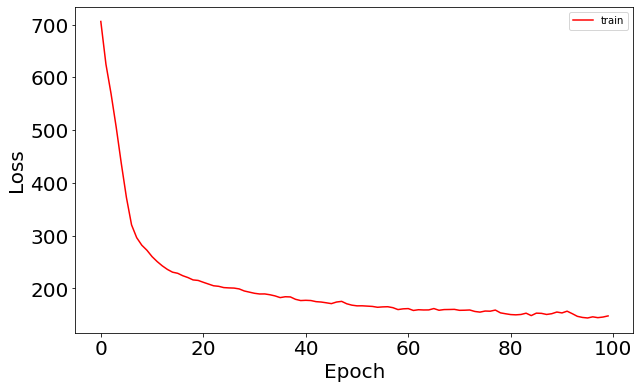

In [673]:
# Plot the loss function with no val
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history_no_val.history['loss']), 'r', label='train')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

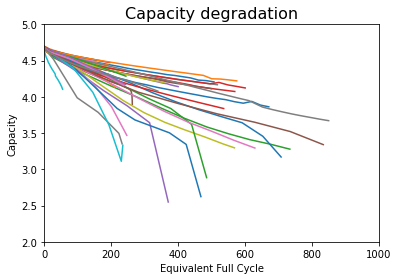

In [675]:
test_key = y_test_coef[:,-1]
l = 1000
w = 2
plot_empirical_selected(test_key,l,w,all_metrics_df)
#真实

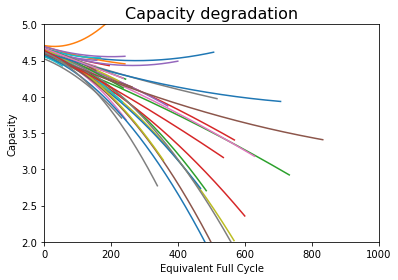

In [676]:
y_with_key_test = np.append(y_pred, test_key.reshape(-1,1), axis = 1)
plot_curve_pred(y_with_key_test,test_key,l,w,all_metrics_df,objective)
#预测

In [677]:
y_pred_true= recover(y_test_norm,y_train)
y_with_key_test_true = np.append(y_pred_true, test_key.reshape(-1,1), axis = 1)

error_after_plot(y_with_key_test,y_with_key_test_true,test_key,all_metrics_df,objective)
# 126 for mae + argumentation + classes weights 1000: 50 : 1
# 259.2145828797483 for mse weight the same 
# 146.34021302317916 argumentation = 0
# 120.03015436941108 argumentation = 0 
# 273 for mse

141.96036369745698

In [678]:
# all cell's RMSE $ MAE
RMS, MAE = pred_error(y_with_key_test,test_key,all_metrics_df,objective)
RMS, MAE
# overall RMSE & MAE
Rms=np.mean(np.array([rms for rms in RMS.values()]))
Mae=np.mean(np.array([mae for mae in MAE.values()]))
display(Rms,Mae)

0.042641434027906946

0.1435187560361763

# Train Cheat Purpose

# =========== Cheating

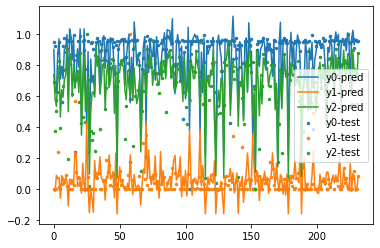

In [216]:
###train###
raw_y_pred = model0.predict(X_train)
y_pred = recover(raw_y_pred,y_train)
x_ax = range(len(X_train))
for i in range(var_num):
    plt.scatter(x_ax, y_train_norm[:,i],  s=6, label=f"y{i}-test")
    plt.plot(x_ax, raw_y_pred[:,i], label=f"y{i}-pred")
plt.legend()
plt.show()

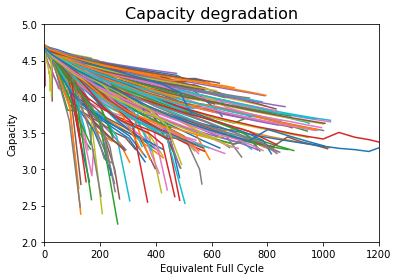

In [217]:
####Train####
test_key = y_train_coef[:,-1]
l = 1200
w = 2
plot_empirical_selected(test_key,l,w,all_metrics_df)
#真实

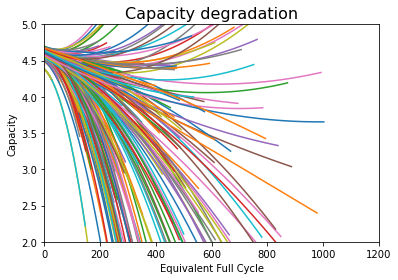

In [218]:
###train
y_with_key_test = np.append(y_pred, test_key.reshape(-1,1), axis = 1)
plot_curve_pred(y_with_key_test,test_key,l,w,all_metrics_df,objective)
#预测

# =========== Cheating

# Error Analysis

In [164]:
# all cell's RMSE $ MAE
RMS, MAE = pred_error(y_with_key_test,test_key,all_metrics_df,objective)
RMS, MAE
# overall RMSE & MAE
Rms=np.mean(np.array([rms for rms in RMS.values()]))
Mae=np.mean(np.array([mae for mae in MAE.values()]))
display(Rms,Mae)

0.2744749500997795

0.7623247823161032

In [652]:
n=275
select_cell = y_with_key[:,-1] == n
print(y_with_key[select_cell,:])
select_cell = y_with_key_test[:,-1] == n
print(y_with_key_test[select_cell,:])

[[ 1.15153666e-06 -1.86115549e-03  4.62245938e+00  2.75000000e+02]]
[[-9.91934147e-07 -1.76176029e-03  4.61840054e+00  2.75000000e+02]]


/var/folders/_w/m21mbpwj00q_0ghj07dwvwj80000gn/T/ipykernel_86913/1345277296.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(key)


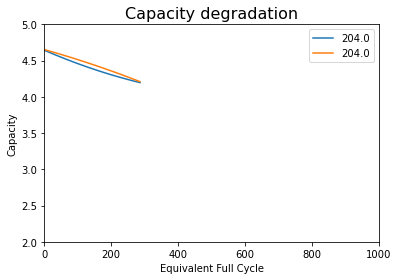

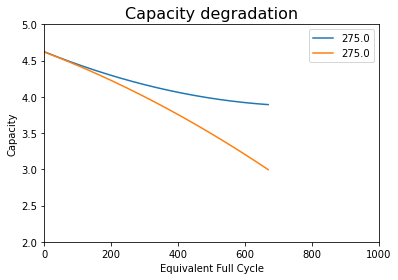

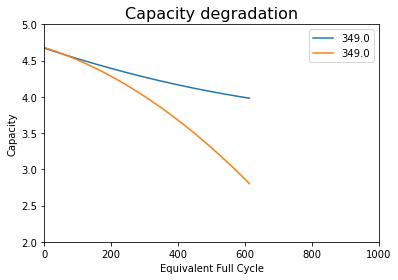

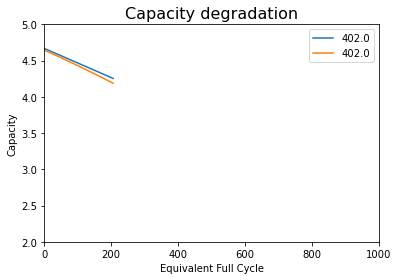

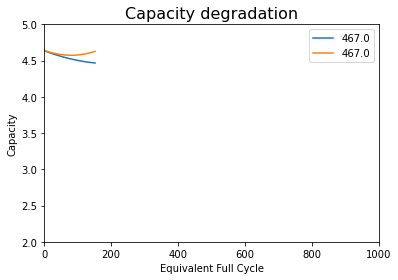

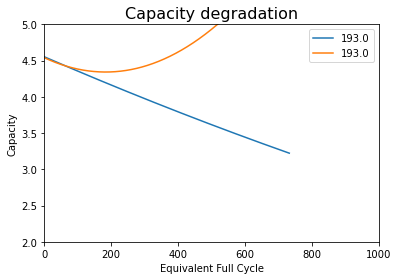

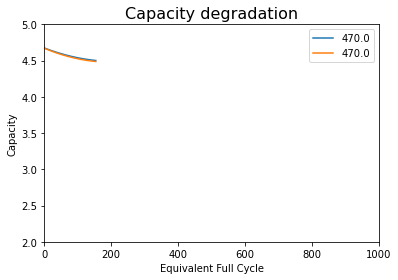

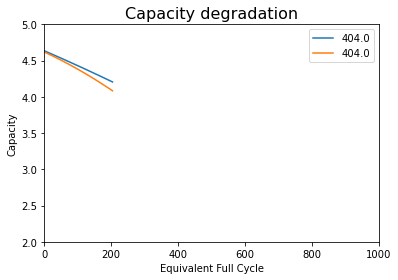

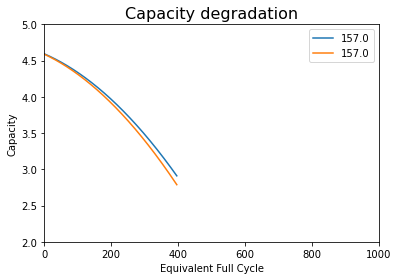

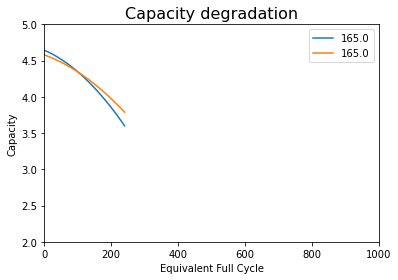

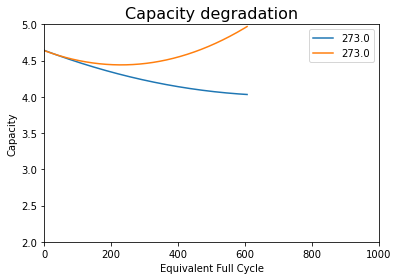

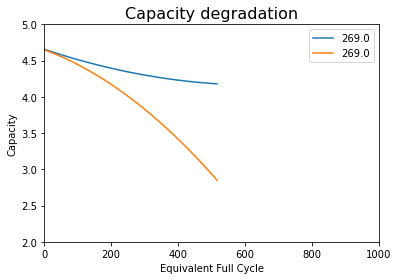

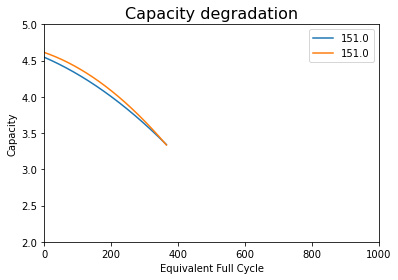

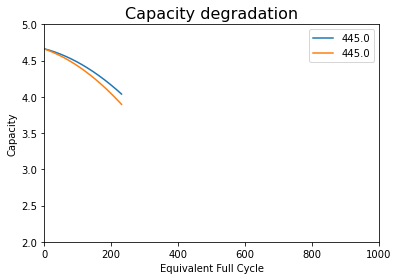

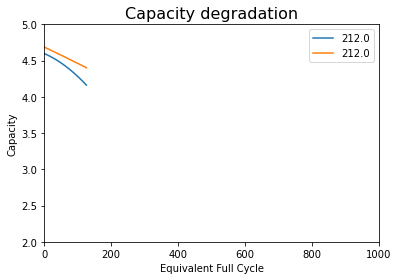

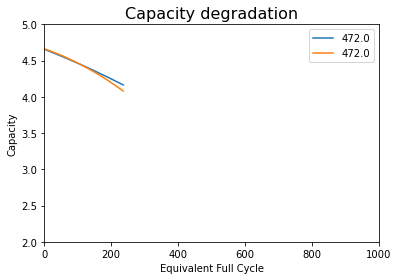

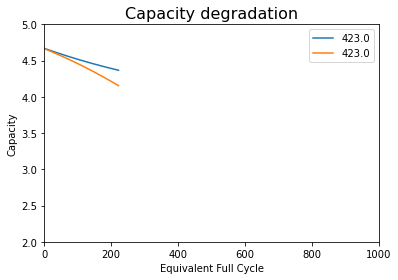

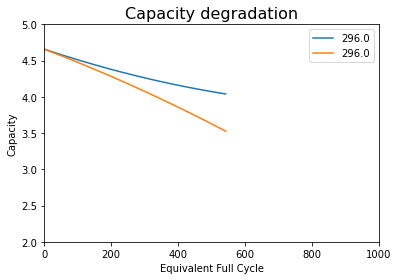

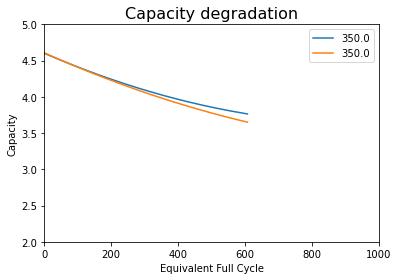

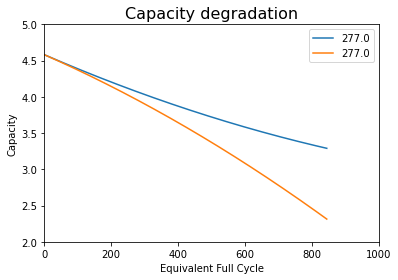

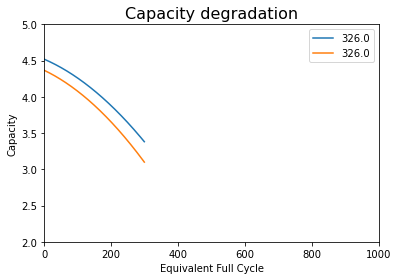

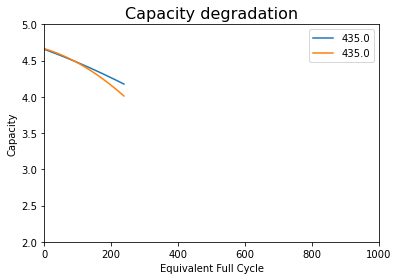

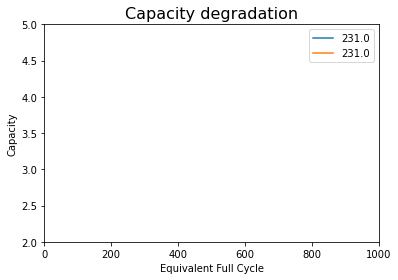

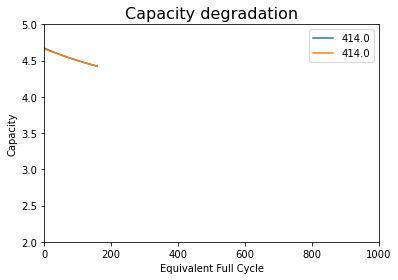

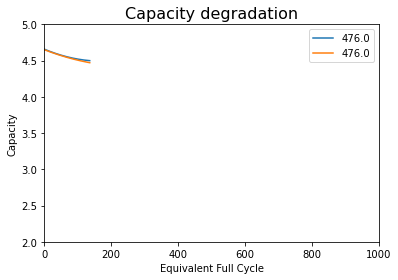

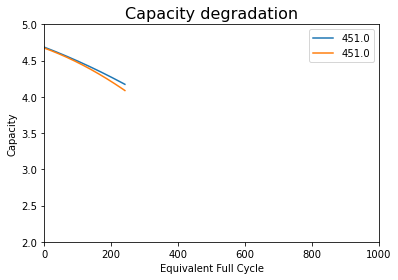

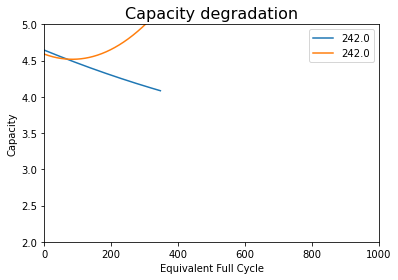

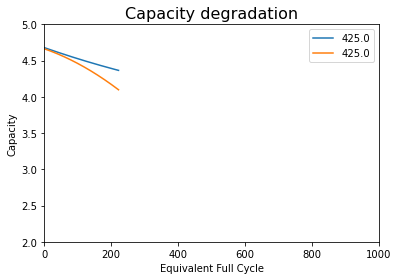

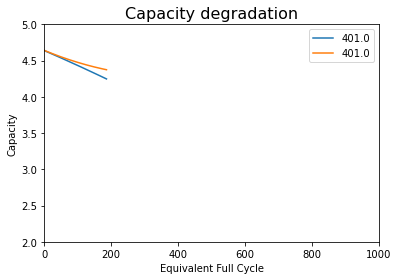

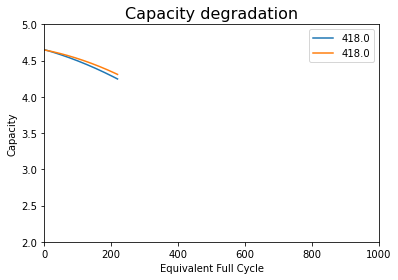

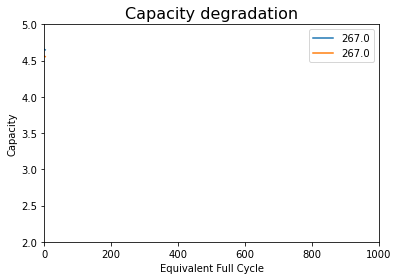

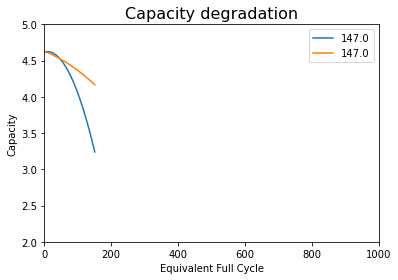

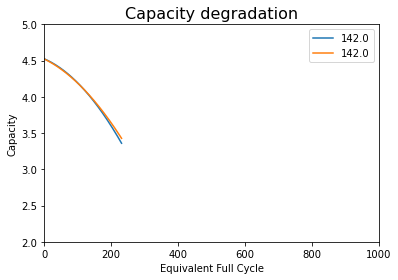

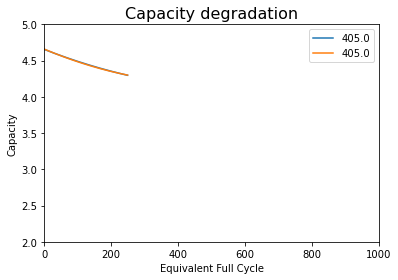

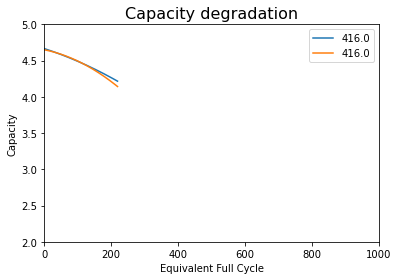

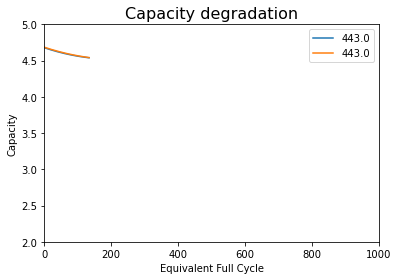

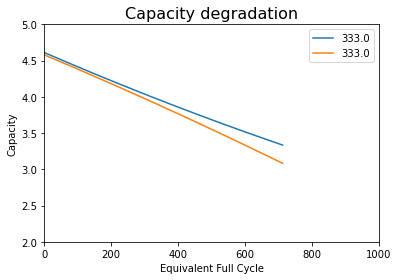

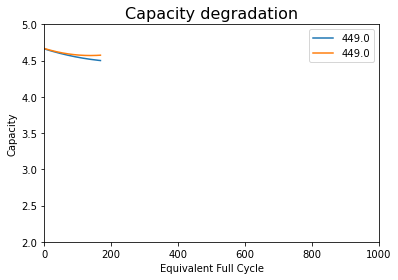

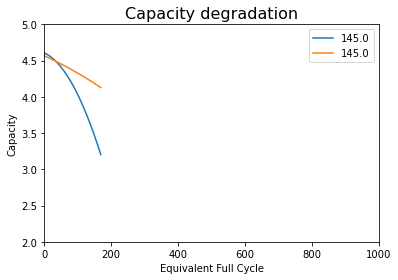

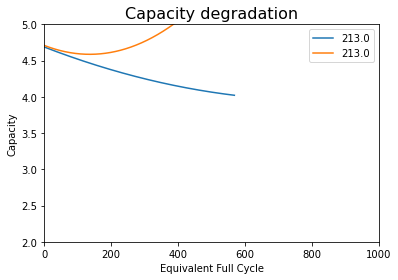

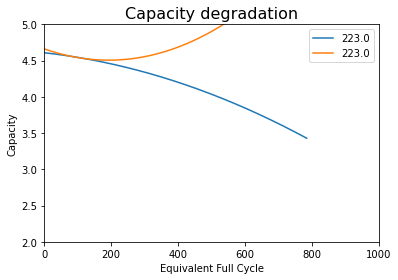

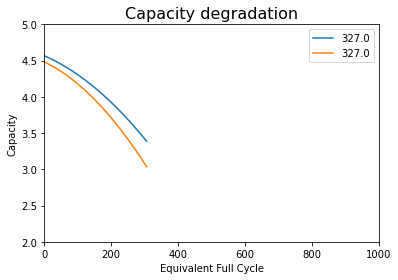

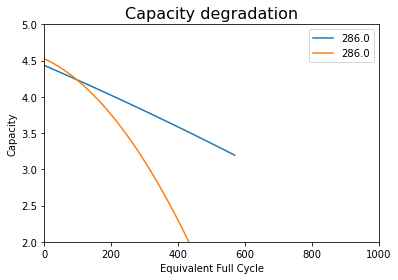

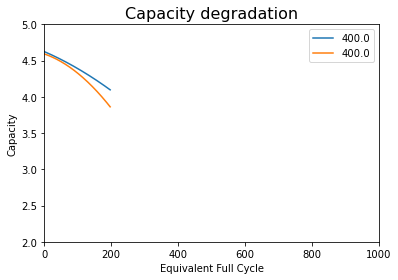

In [653]:
#Predicted Model
for key in test_key:
    inputk = np.array([key])
    plt.figure(key)
    #plot_empirical_selected(inputk,l,d,all_metrics_df)
    plot_curve_pred(y_with_key_test_true,inputk,l,w,all_metrics_df,objective)
    plot_curve_pred(y_with_key_test,inputk,l,w,all_metrics_df,objective)


/var/folders/_w/m21mbpwj00q_0ghj07dwvwj80000gn/T/ipykernel_86913/2724505573.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(key)


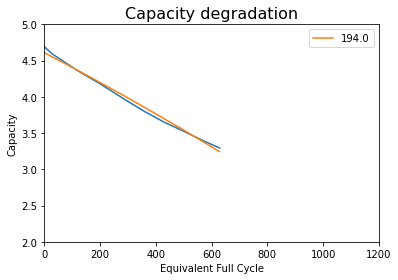

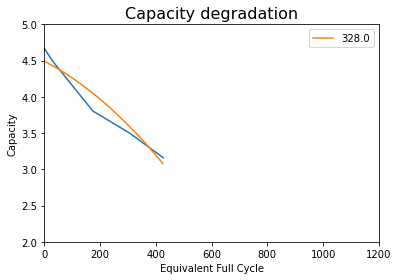

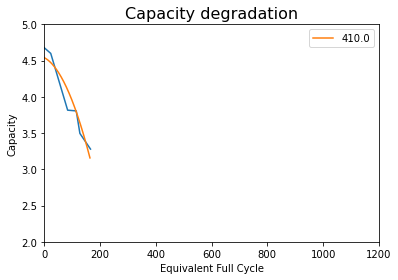

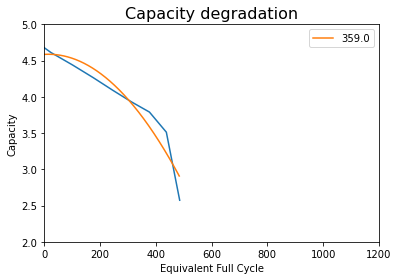

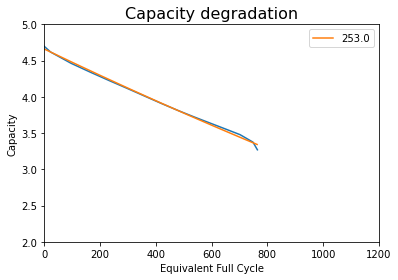

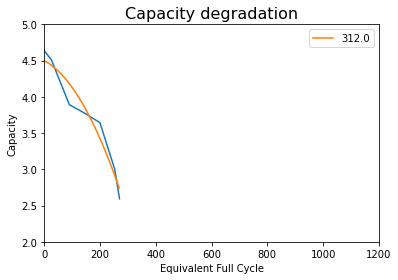

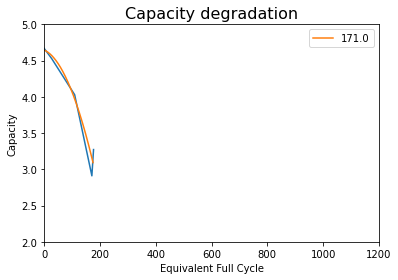

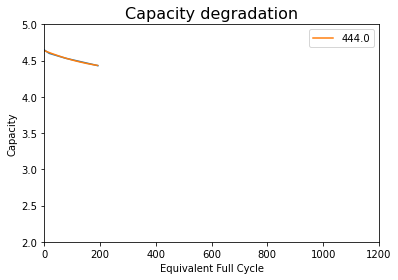

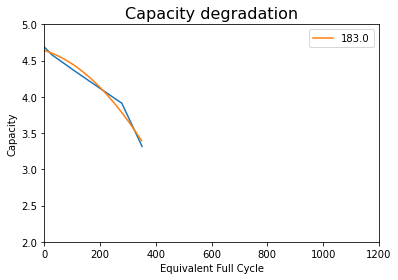

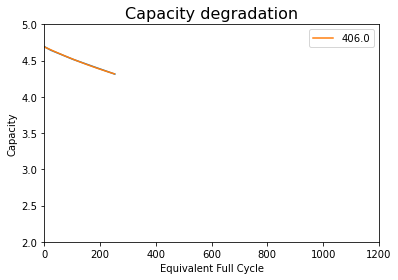

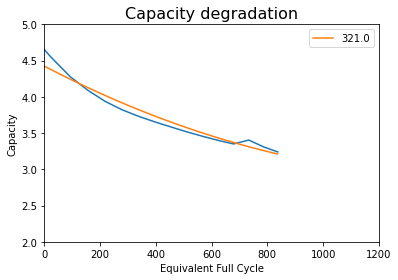

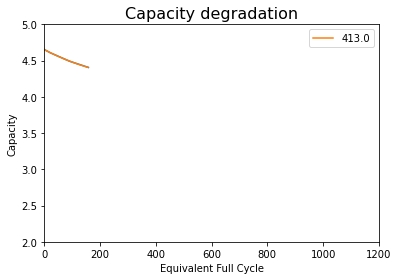

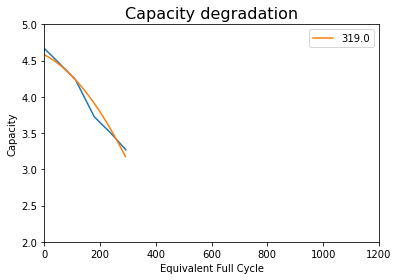

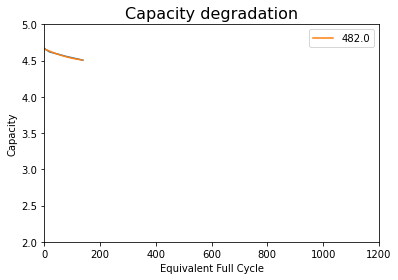

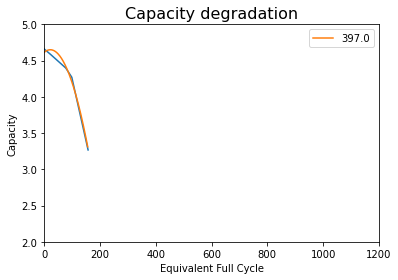

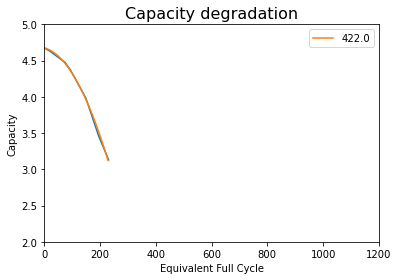

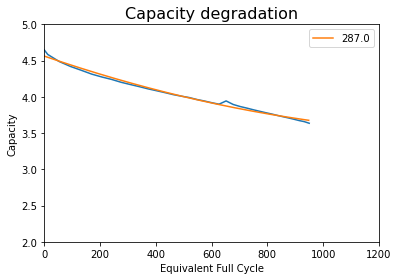

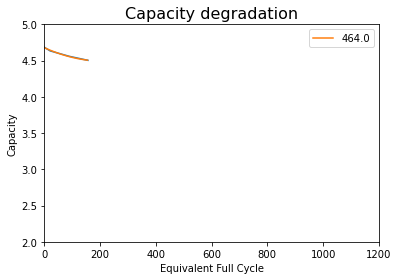

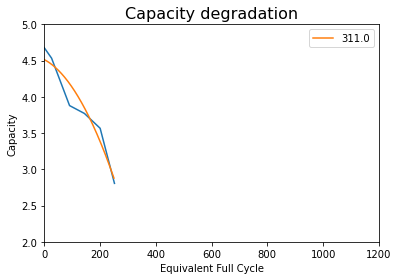

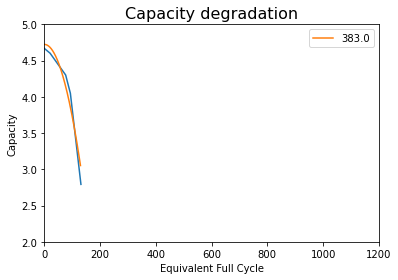

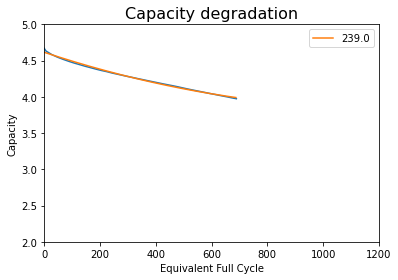

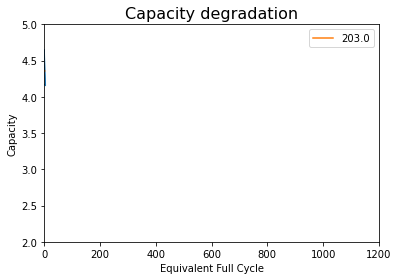

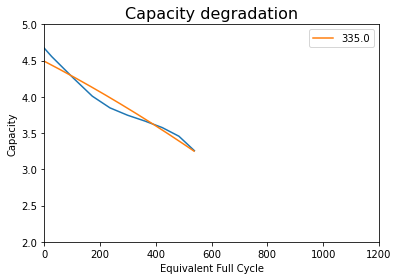

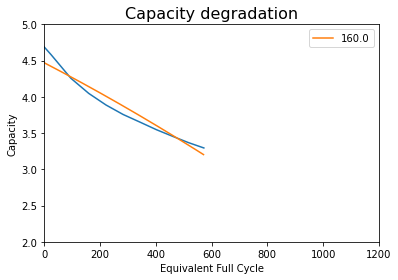

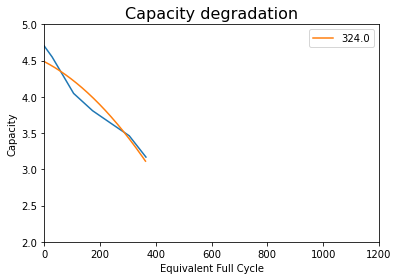

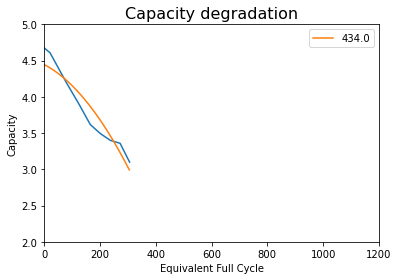

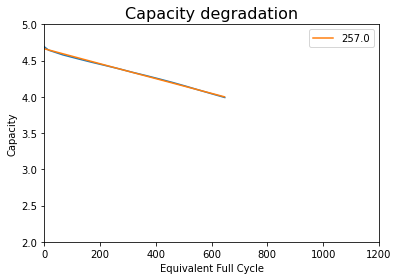

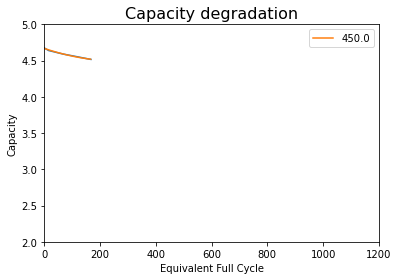

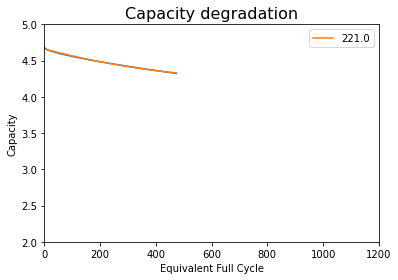

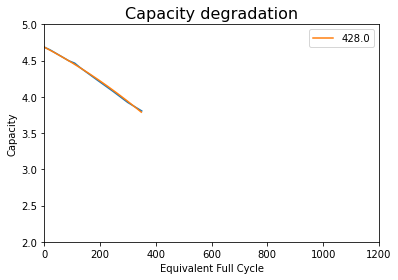

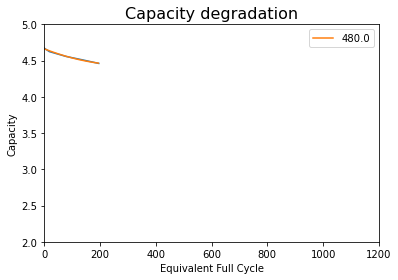

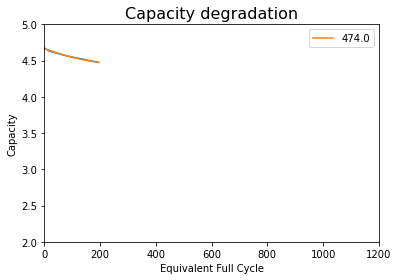

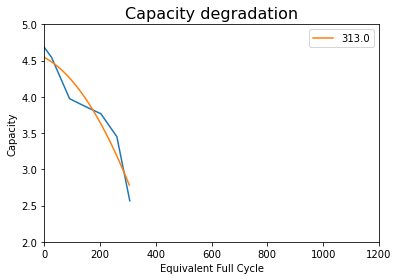

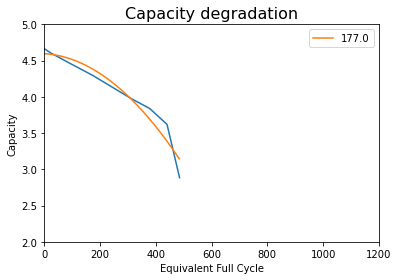

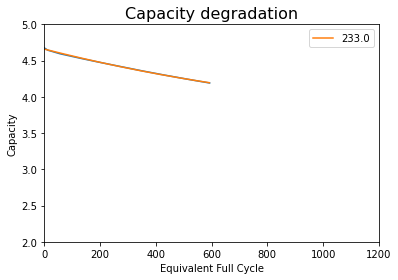

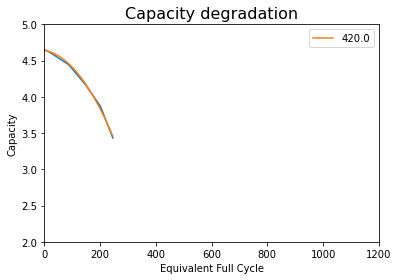

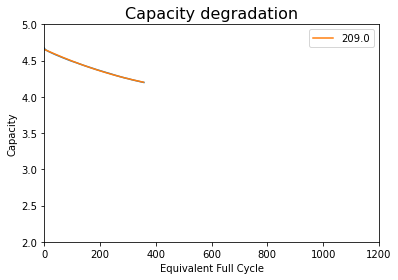

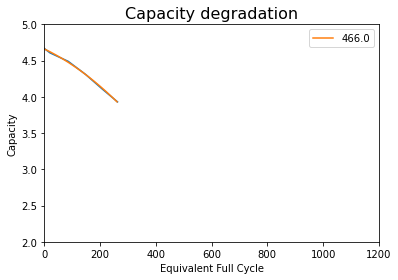

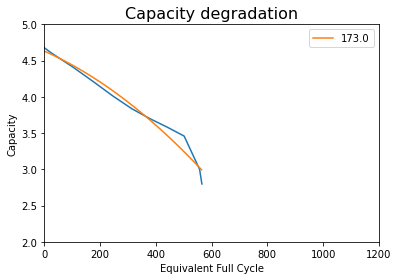

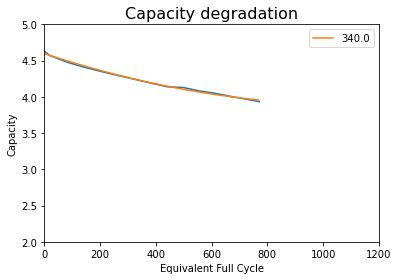

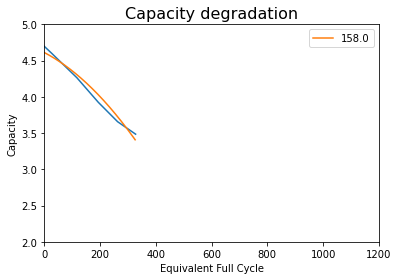

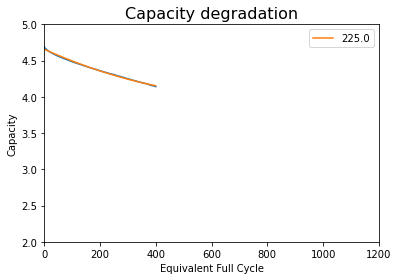

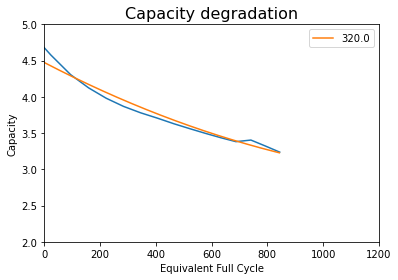

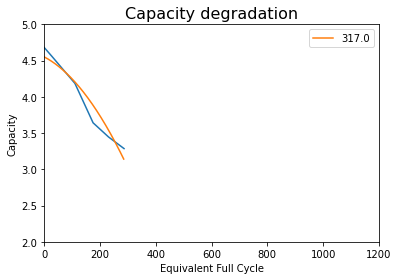

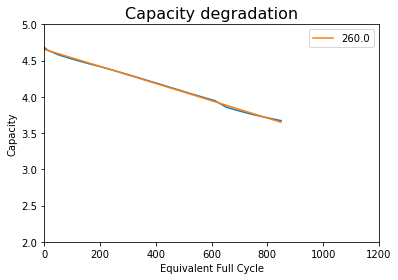

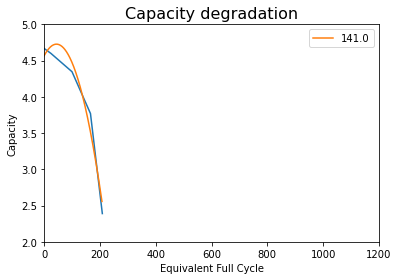

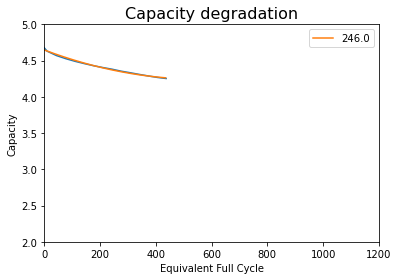

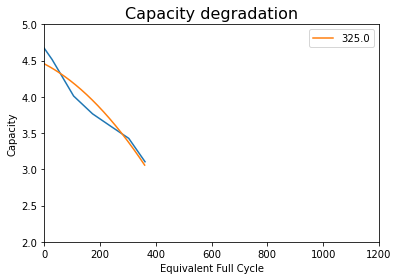

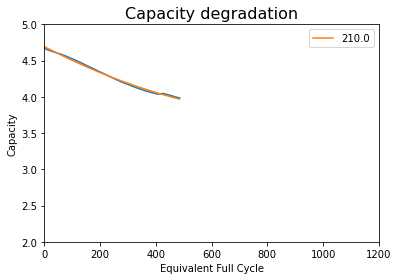

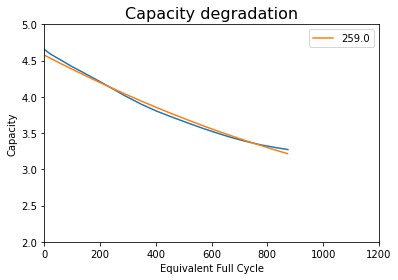

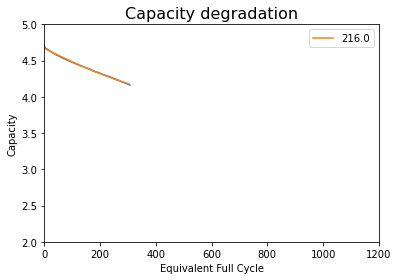

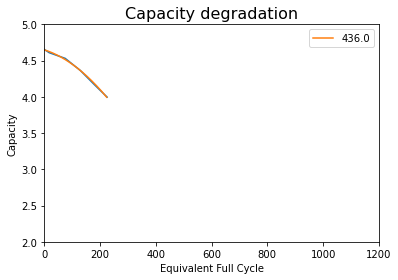

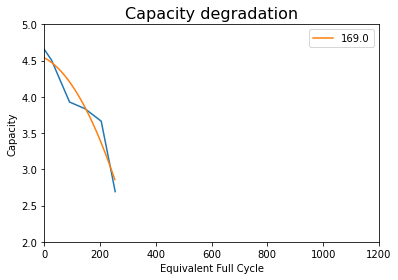

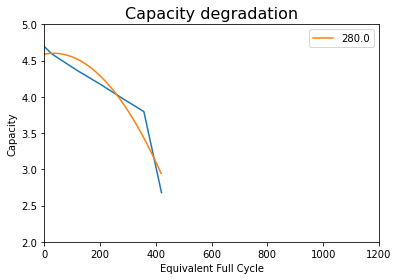

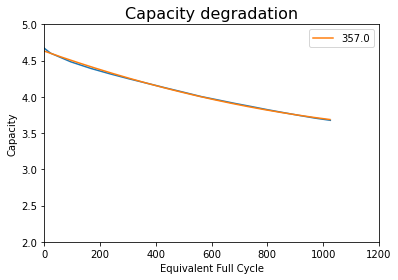

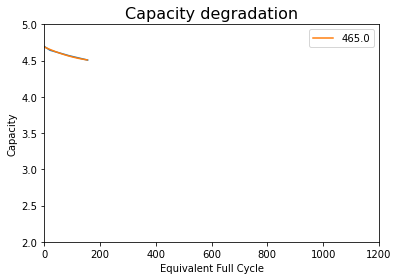

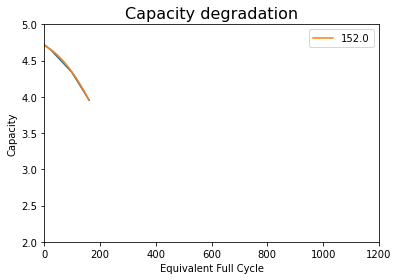

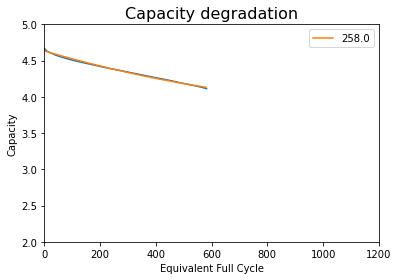

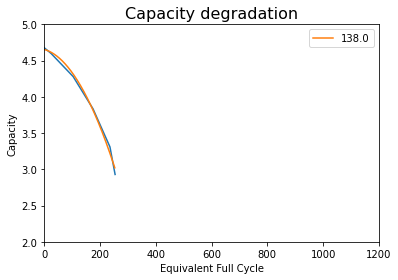

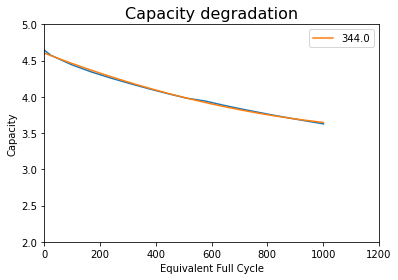

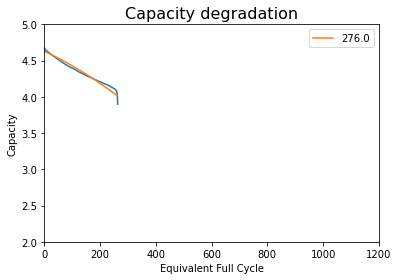

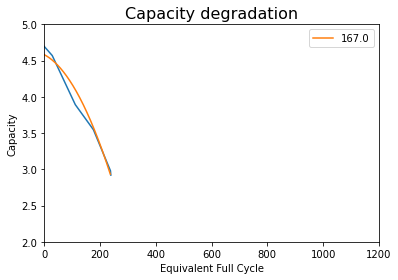

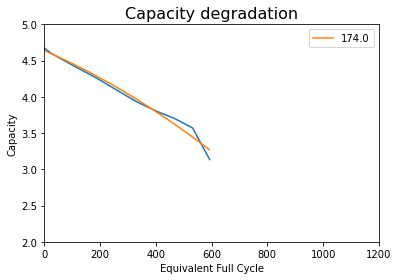

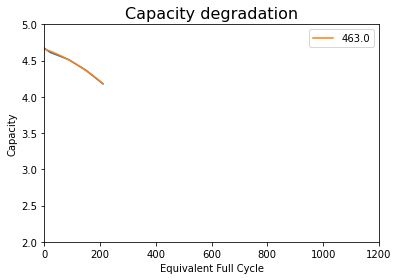

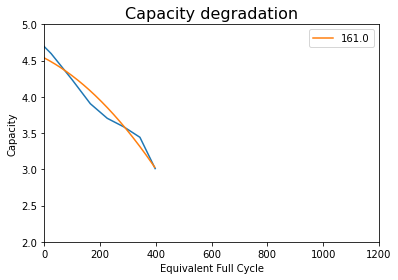

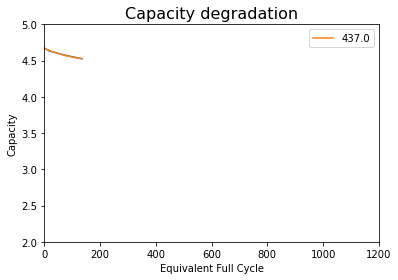

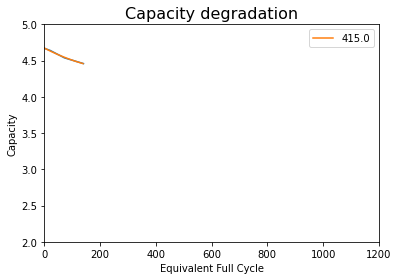

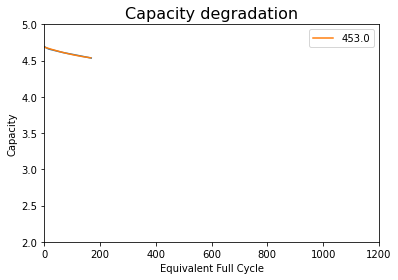

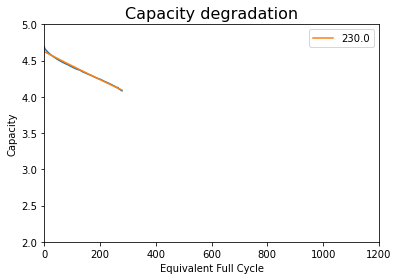

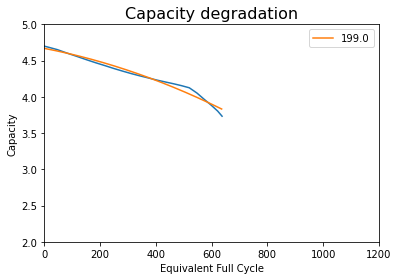

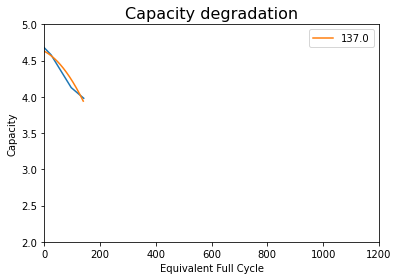

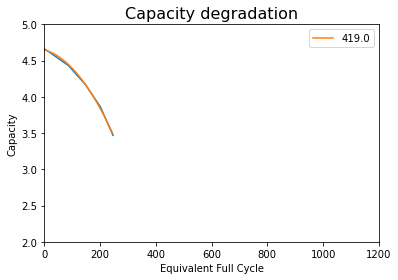

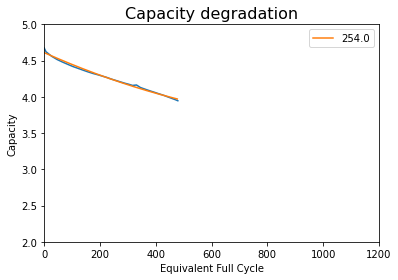

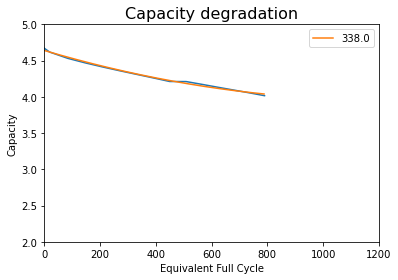

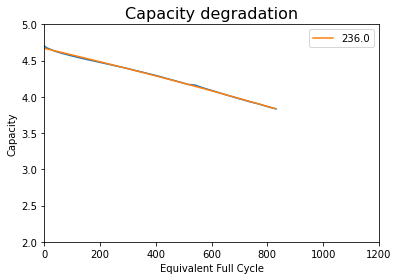

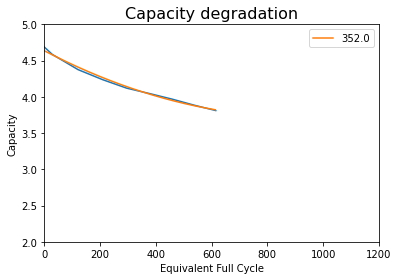

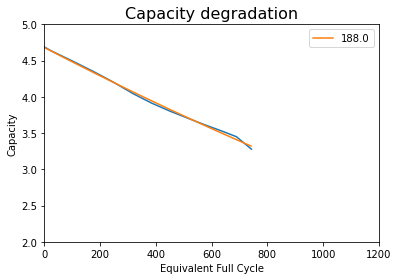

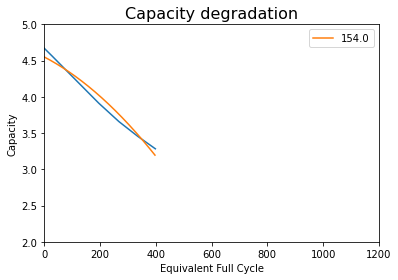

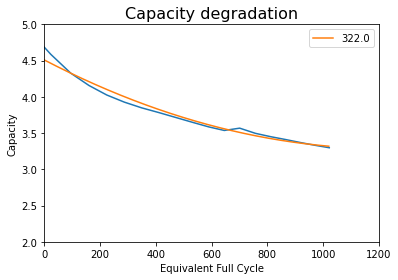

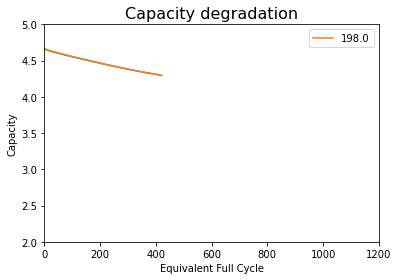

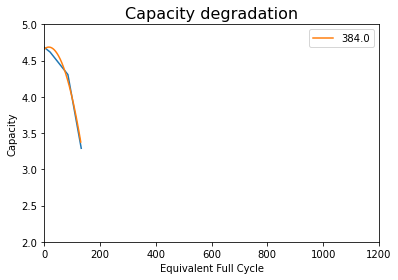

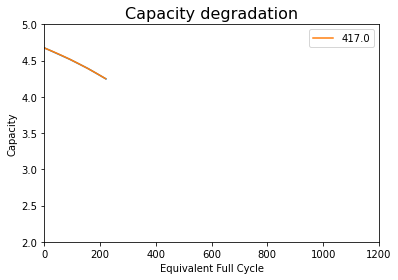

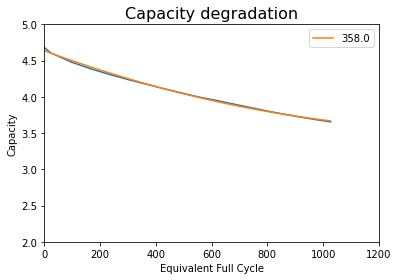

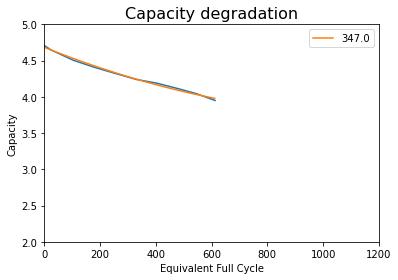

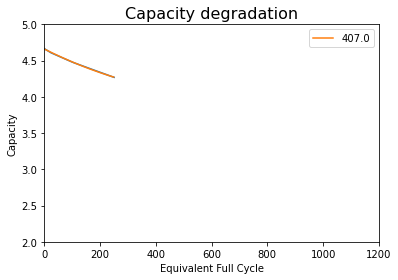

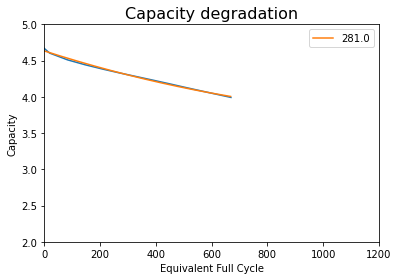

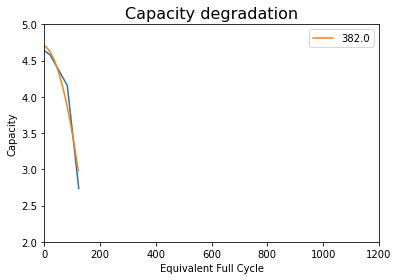

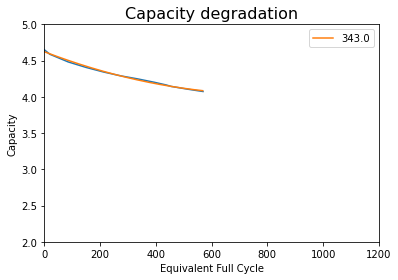

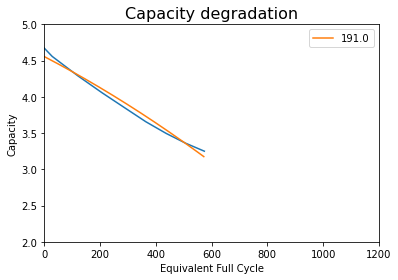

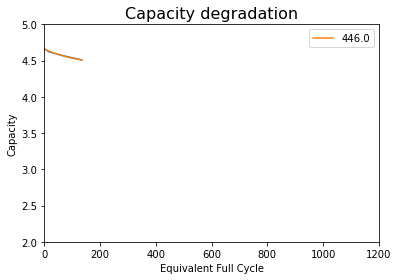

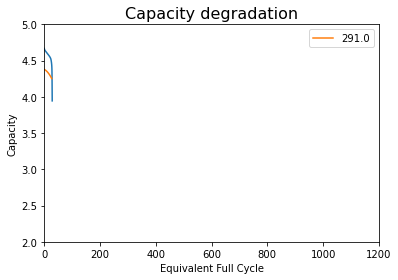

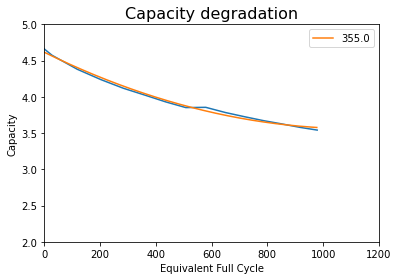

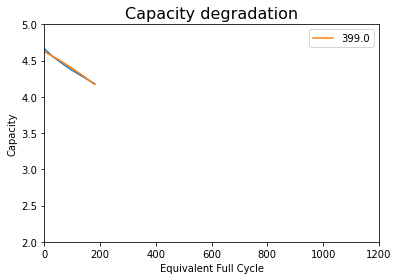

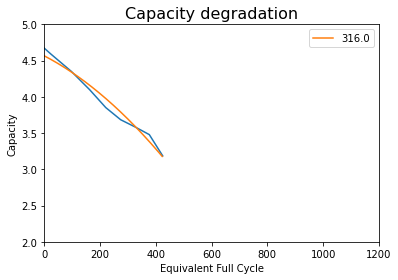

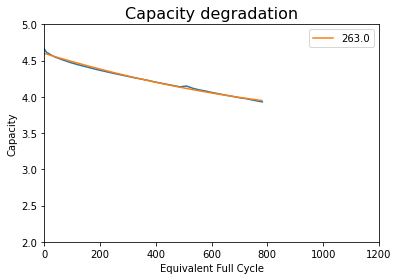

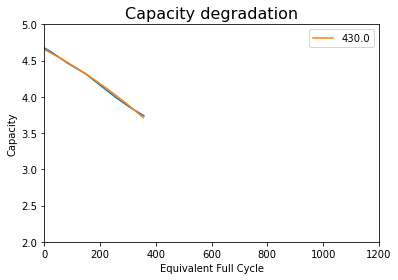

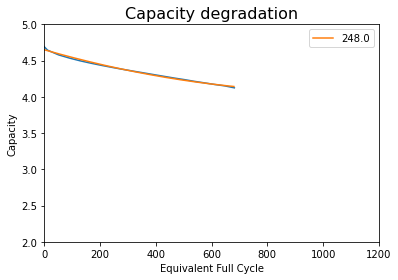

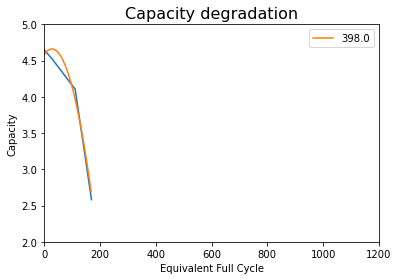

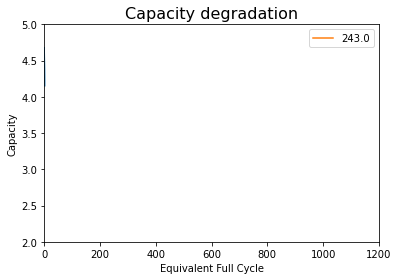

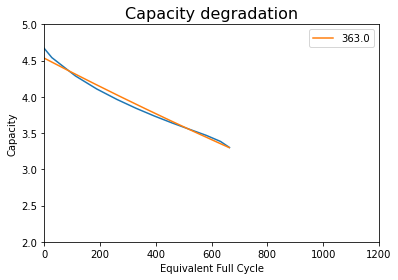

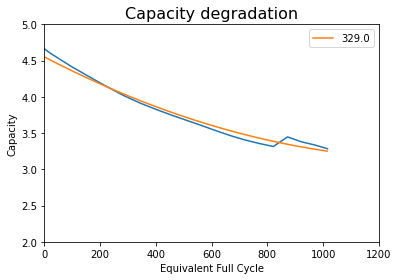

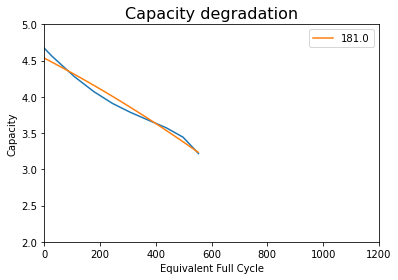

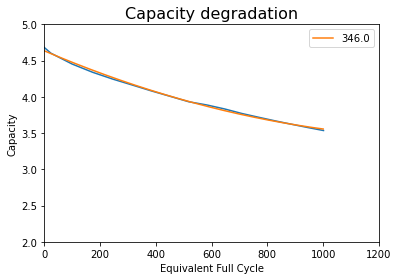

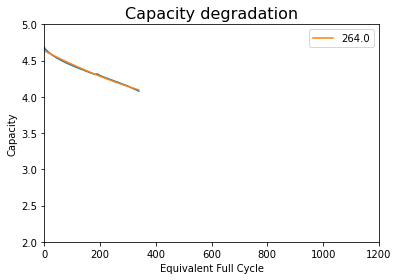

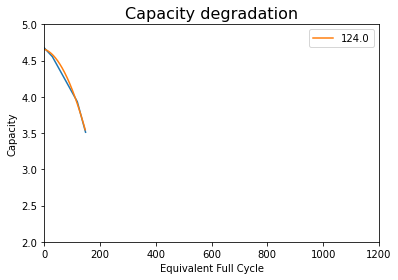

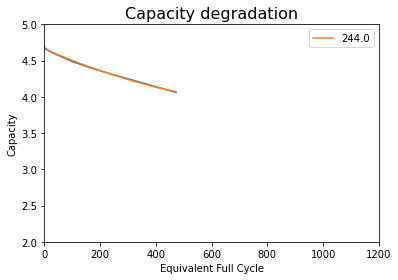

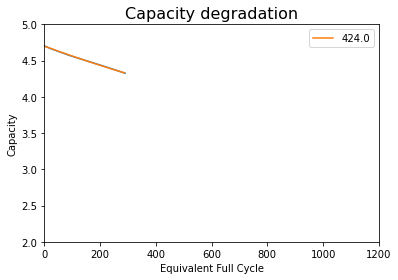

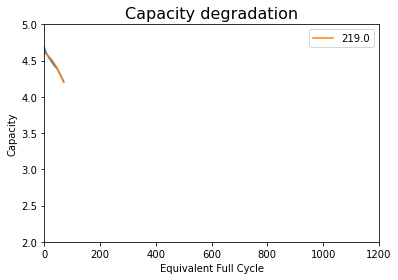

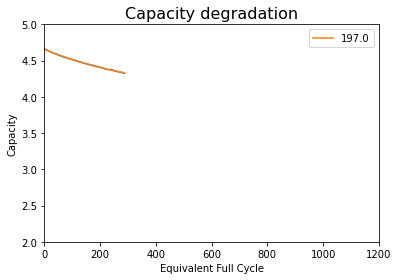

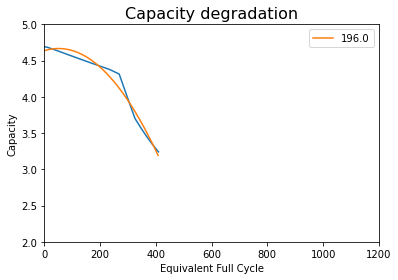

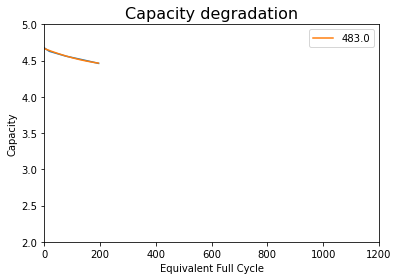

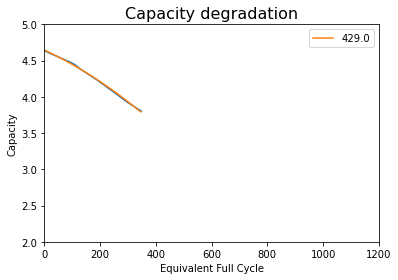

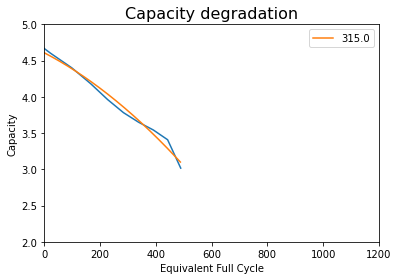

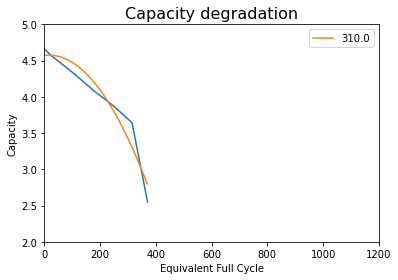

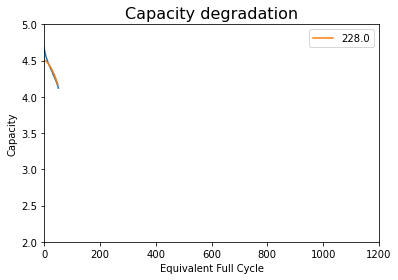

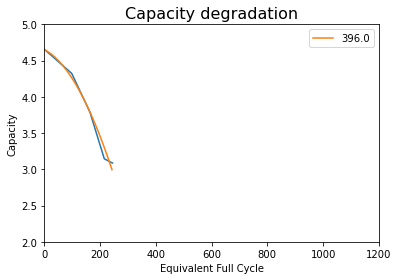

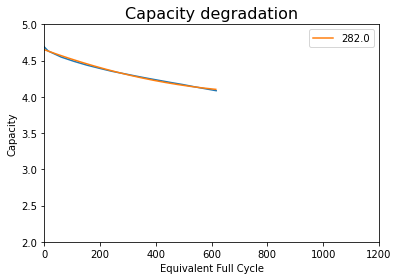

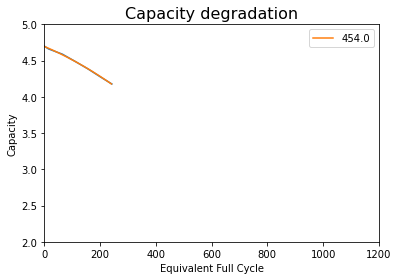

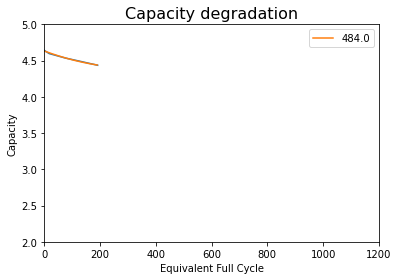

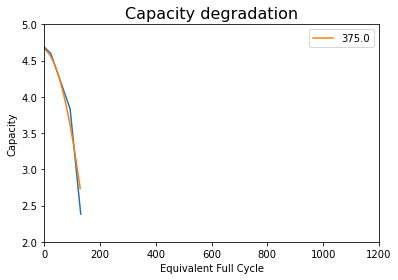

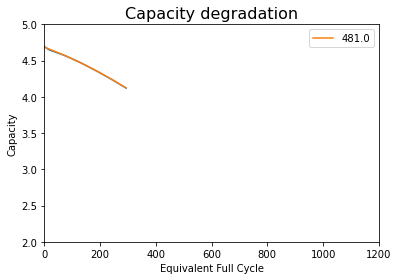

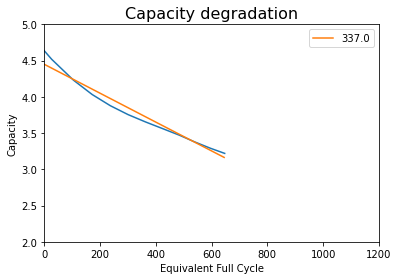

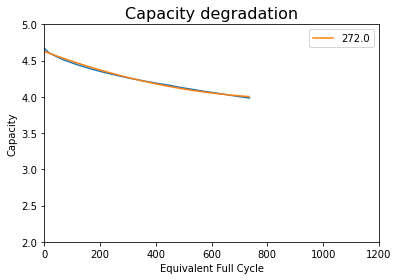

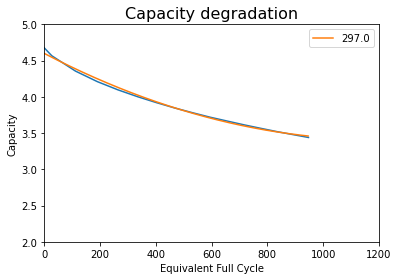

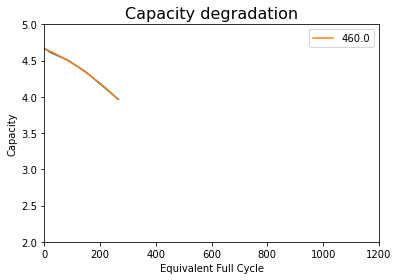

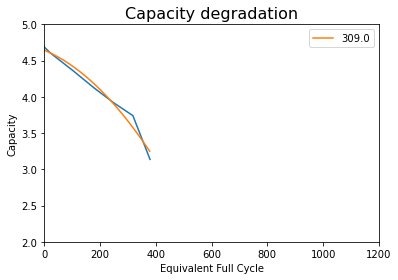

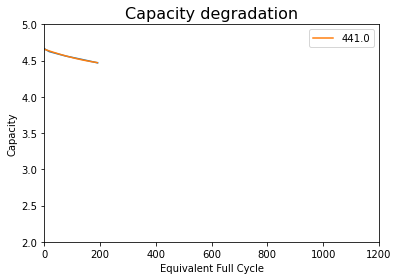

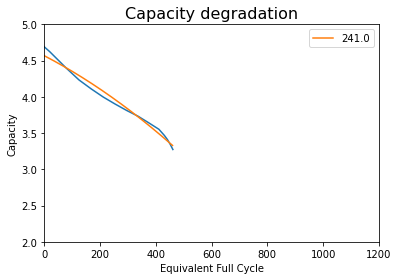

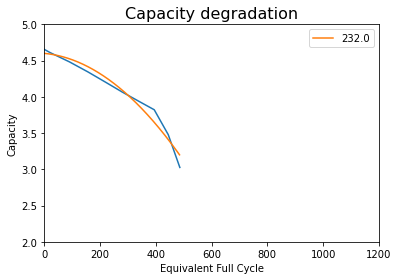

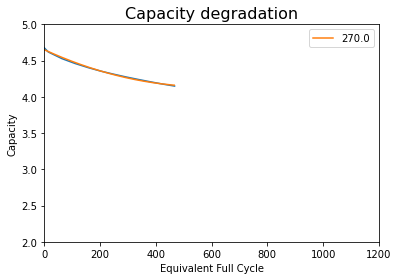

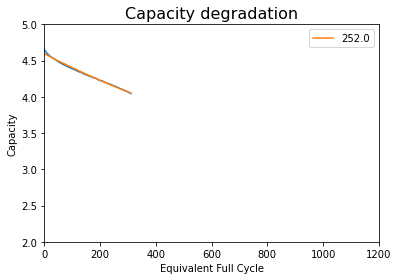

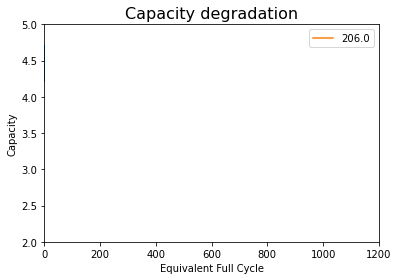

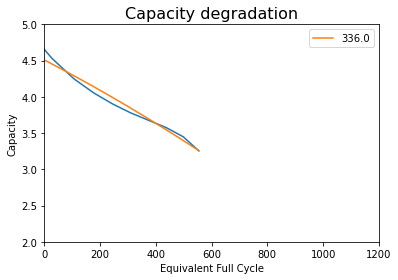

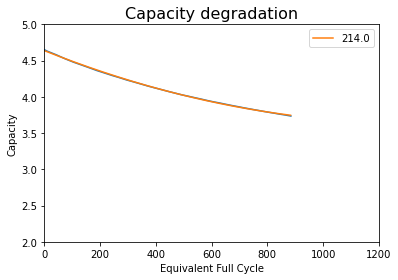

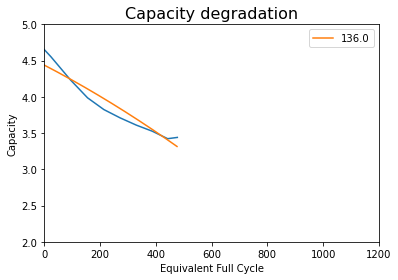

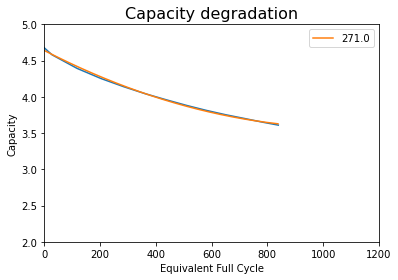

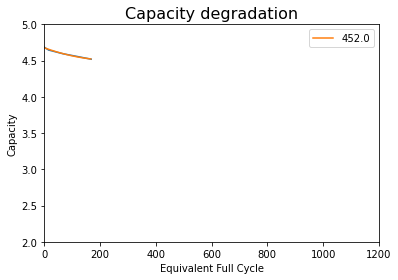

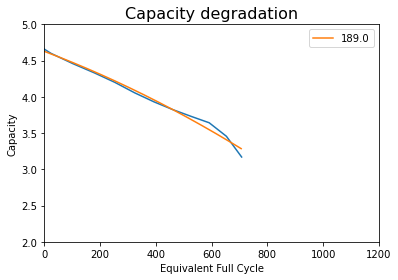

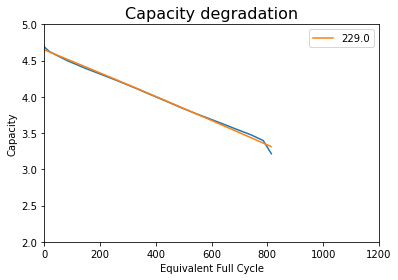

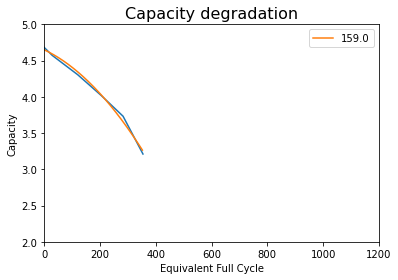

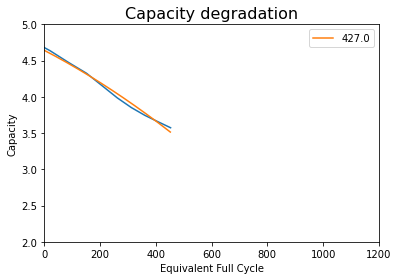

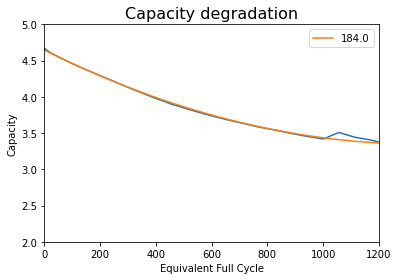

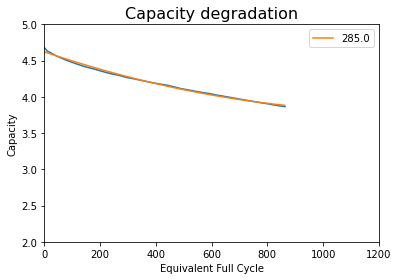

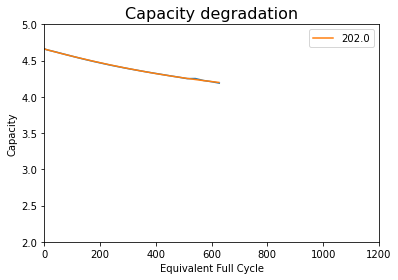

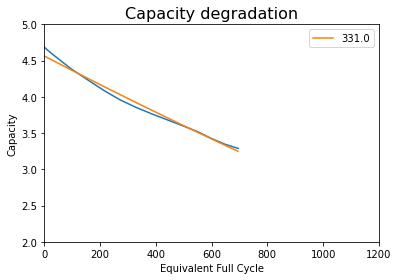

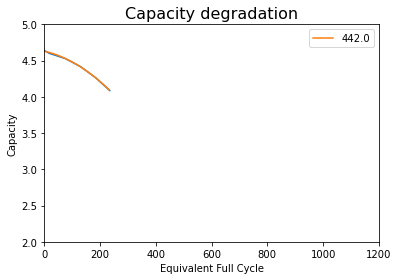

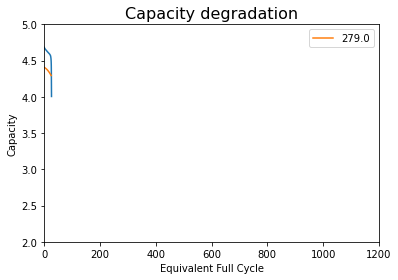

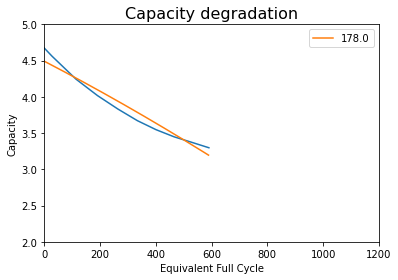

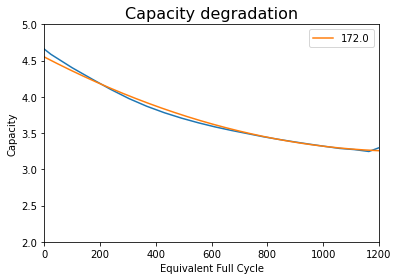

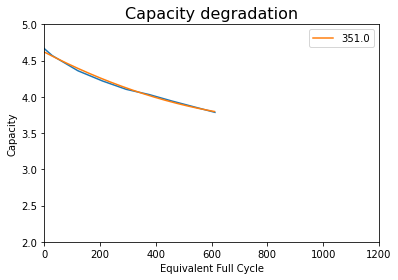

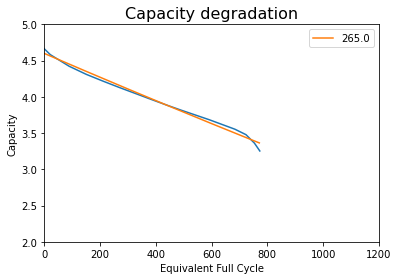

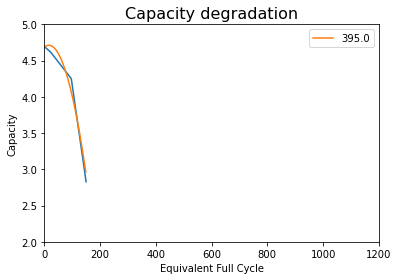

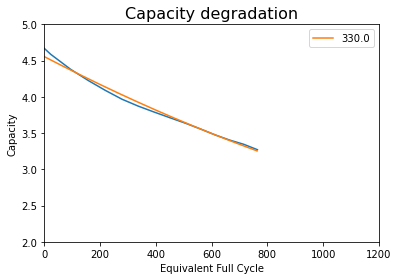

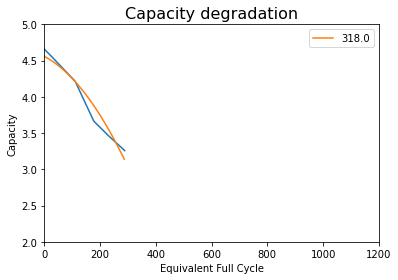

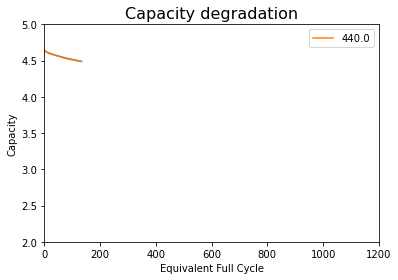

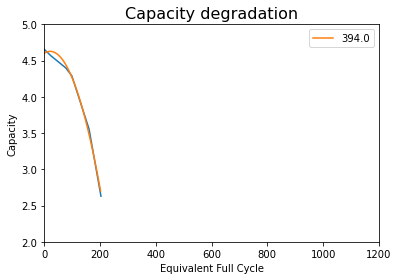

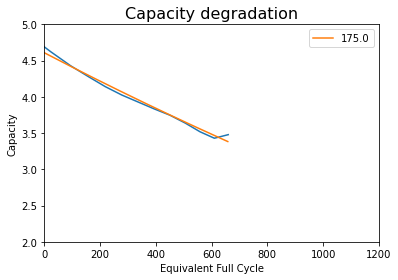

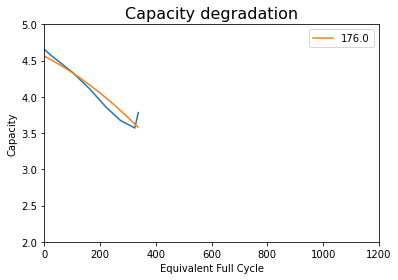

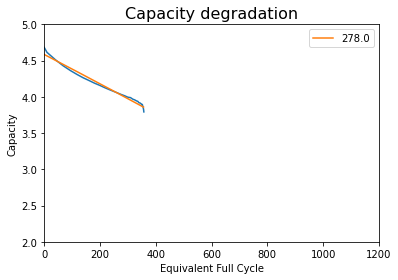

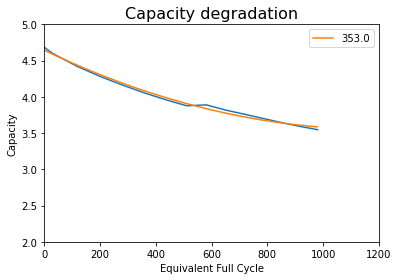

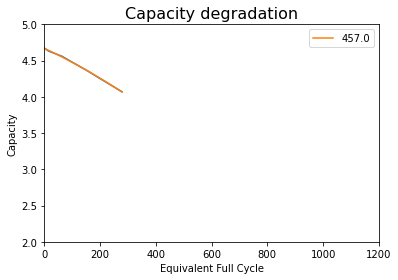

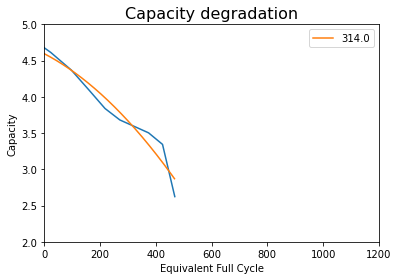

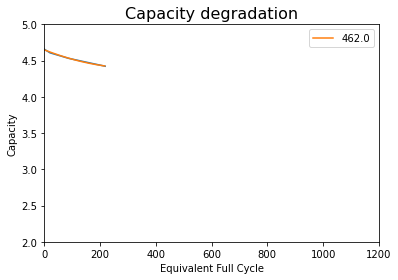

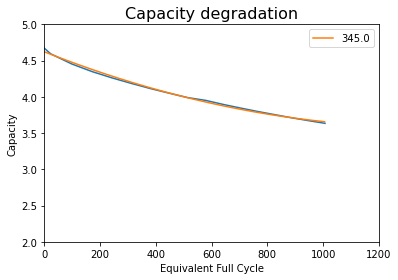

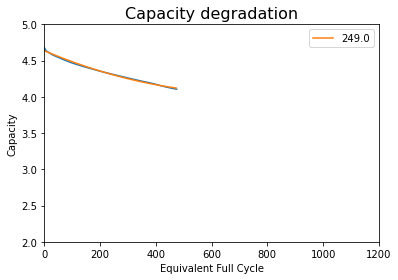

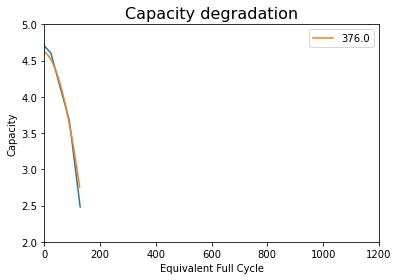

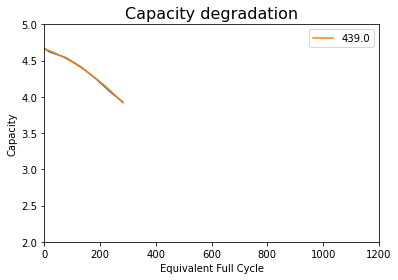

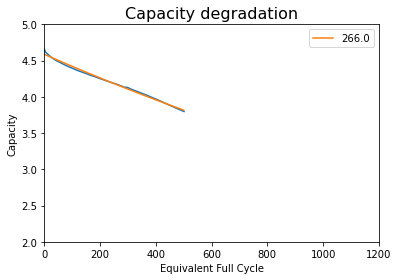

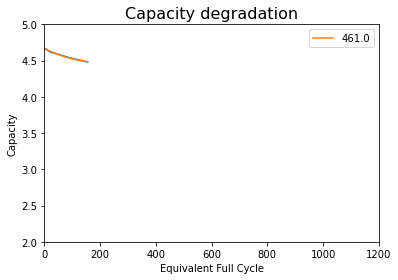

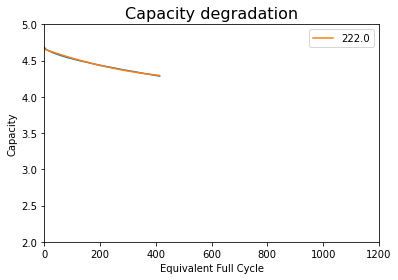

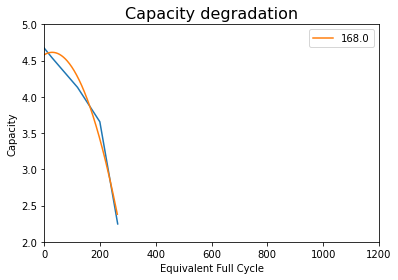

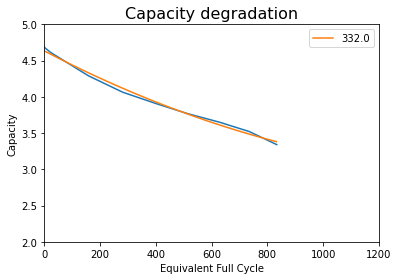

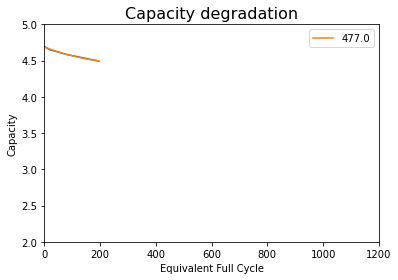

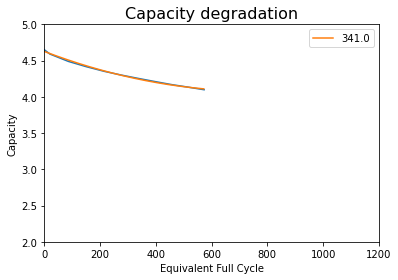

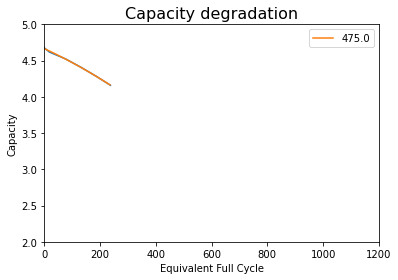

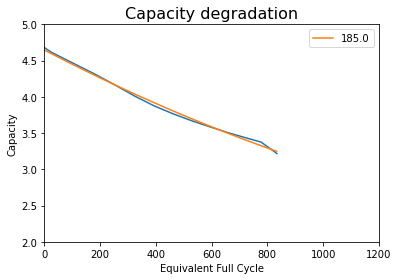

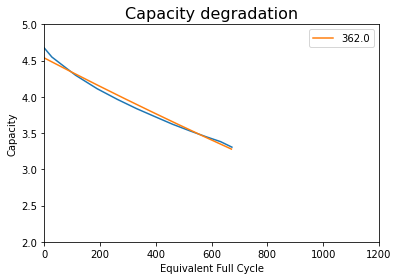

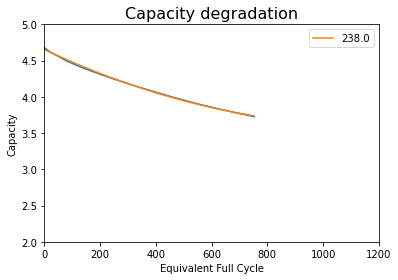

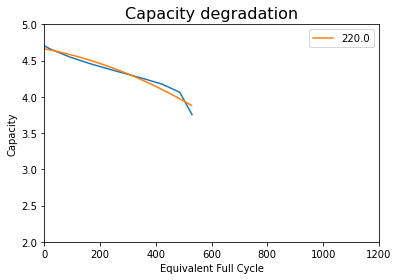

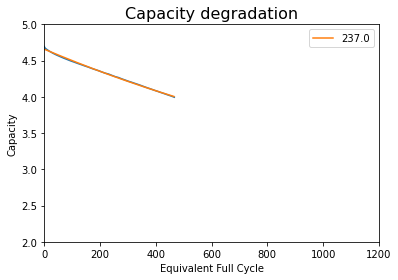

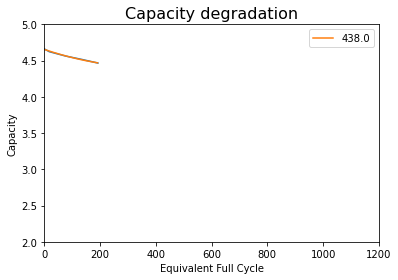

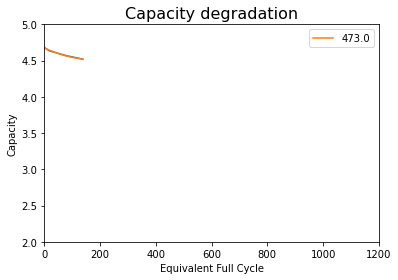

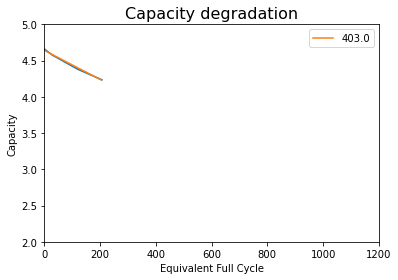

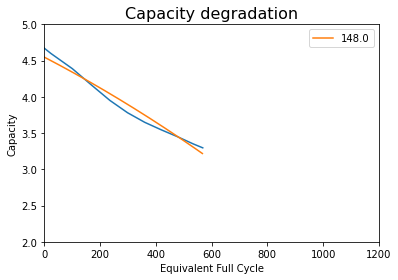

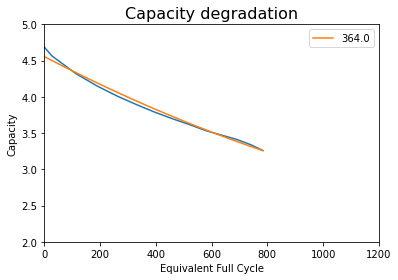

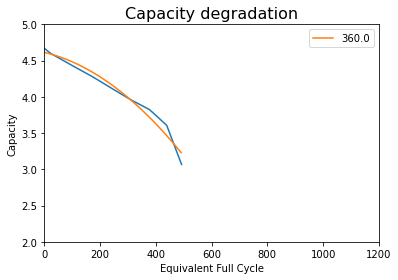

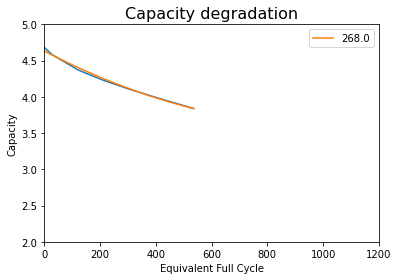

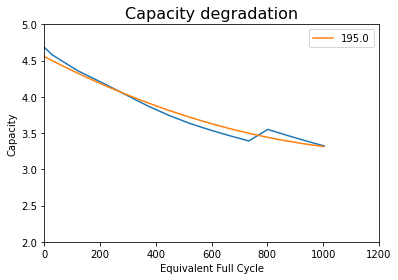

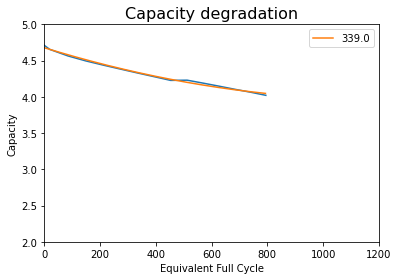

In [166]:
#true curve
for key in test_key:
    inputk = np.array([key])
    plt.figure(key)
    plot_empirical_selected(inputk,l,d,all_metrics_df)
    plot_curve_pred(y_with_key,inputk,l,w,all_metrics_df,objective)
